In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
data.pop('petal length (cm)')
data.pop('petal width (cm)')

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

In [5]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
# импортируем классы

data_class = iris.target

# ВОПРОС: data_class и есть variety?

In [8]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

# импортируем LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем данные
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(x_test)

array([1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0])

In [12]:
# проверим точность
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.7894736842105263

In [13]:
# определим центры
lda.means_

array([[4.98421053, 3.43947368],
       [5.87222222, 2.78333333],
       [6.62894737, 2.96842105]])

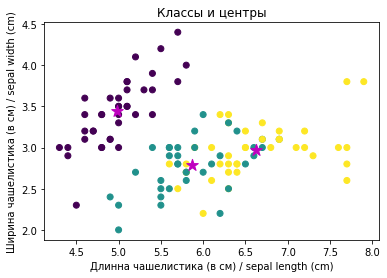

In [14]:
# визуализируем классы
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)

# визуализируем центры
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='m', s=150, marker='*')

plt.title('Классы и центры')
plt.xlabel('Длинна чашелистика (в см) / sepal length (cm)')
plt.ylabel('Ширина чашелистика (в см) / sepal width (cm)') 

plt.show()

In [14]:
# Вывод: видно, что два класса смешались и сложно разлечимы. Их центры расположены близко.

In [17]:
from sklearn.cluster import KMeans

In [18]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [19]:
#  строим график локтя

# создаем список для инерции и задаем диапазон кластеров
k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

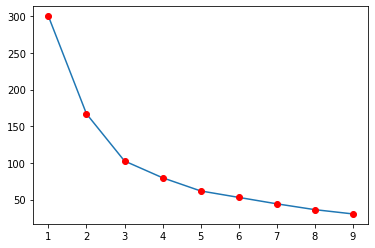

In [20]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [21]:
# попробуем автоматически распределить данные по двум классам: довольно очевидно, что класса два
kmeans_2 = KMeans(n_clusters=2)

clusters_2 = kmeans_2.fit_predict(data_scaled)
clusters_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

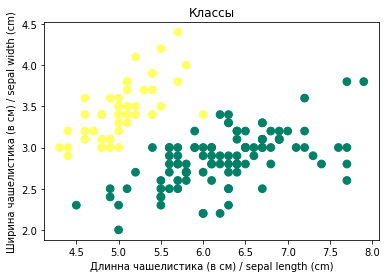

In [22]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=clusters_2, cmap='summer', s=60)
plt.title('Классы')
plt.xlabel('Длинна чашелистика (в см) / sepal length (cm)')
plt.ylabel('Ширина чашелистика (в см) / sepal width (cm)') 
plt.show()

In [23]:
# посмотрим, что получится для трех классов
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters=3)

clusters_3 = kmeans_3.fit_predict(data_scaled)
clusters_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

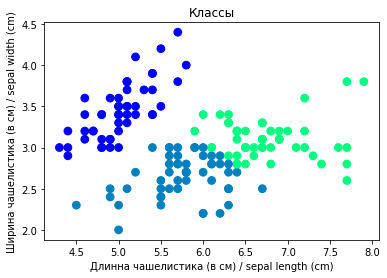

In [24]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=clusters_3, cmap='winter', s=60)
plt.title('Классы')
plt.xlabel('Длинна чашелистика (в см) / sepal length (cm)')
plt.ylabel('Ширина чашелистика (в см) / sepal width (cm)') 
plt.show()

# два смотрятся лучше